In [3]:
import numpy as np
import matplotlib.pyplot as plt

tmin = 0
tmax = 10
samples = 101

times = np.linspace(tmin, tmax, samples)

In [4]:
def const(x):
    return 1

def linear(x):
    return x

def quad(x):
    return x ** 2

def cubic(x):
    return x ** 3

def quartic(x):
    return x ** 4

def exp(x):
    return np.exp(x)

In [5]:
def design_matrix(basis, times):
    mat = [[func(time) for func in basis] for time in times]
    return mat

def pseudo_inverse(a):
    return np.linalg.pinv(a)

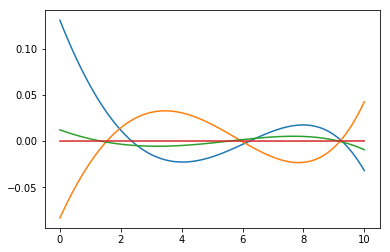

In [7]:
basis = [const, linear, quad, quartic]

ydata = pseudo_inverse(design_matrix(basis, times))
xdata = times

for row in ydata:
    plt.plot(xdata, row)

plt.show()

[1.9999999999999996, 1.000000000000007, -5.000000000000024]


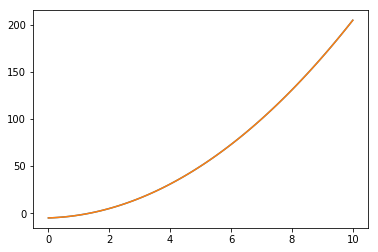

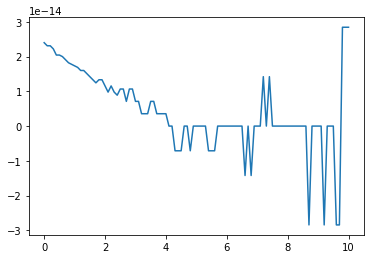

In [8]:
sample_data = 2 * quad(times) + 1 * linear(times) - 5 * const(times) + np.random.normal(0, 0, len(times))

basis = [quad, linear, const]

des_mat = design_matrix(basis, times)
p_inv = pseudo_inverse(des_mat)

fit_params = [np.convolve(row, np.flip(sample_data), 'valid')[0] for row in p_inv]

print(fit_params)

fit_sample = [np.sum([fit_params[i] * basis[i](time) for i in range(0,len(basis))]) for time in times]

plt.plot(times, sample_data)
plt.plot(times, fit_sample)

plt.show()

plt.plot(times, sample_data - fit_sample)
plt.show()